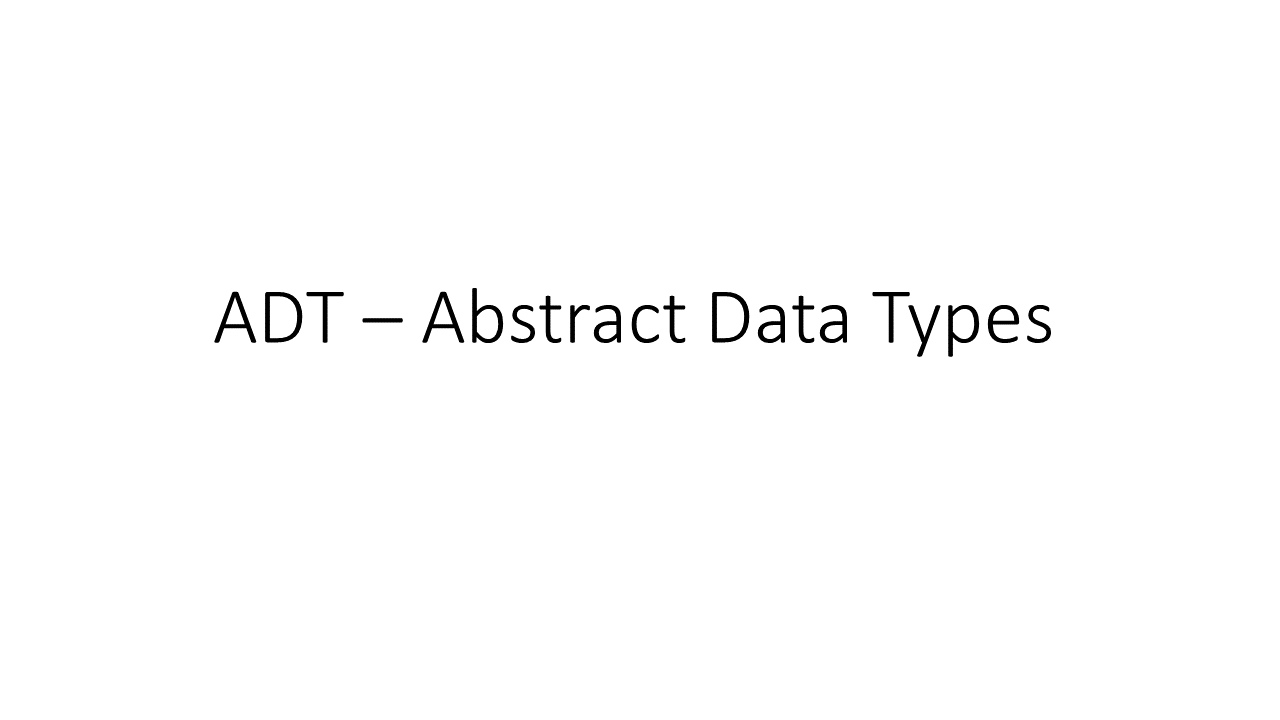

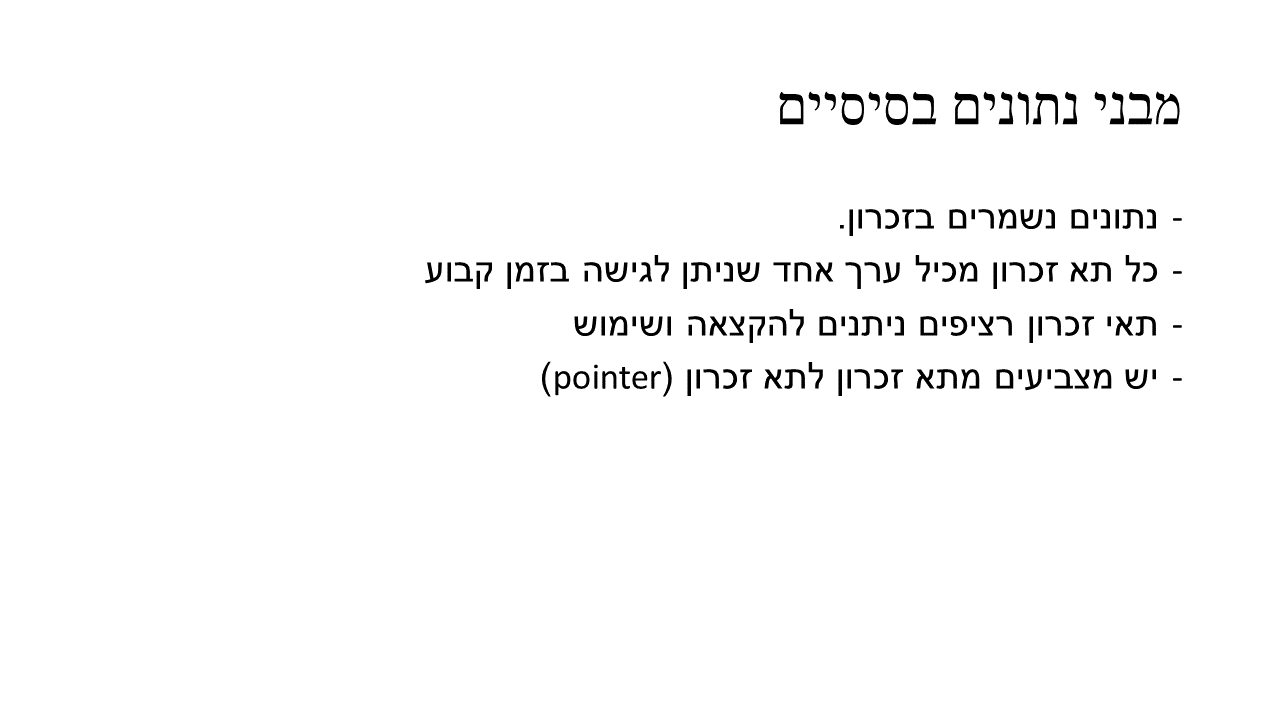

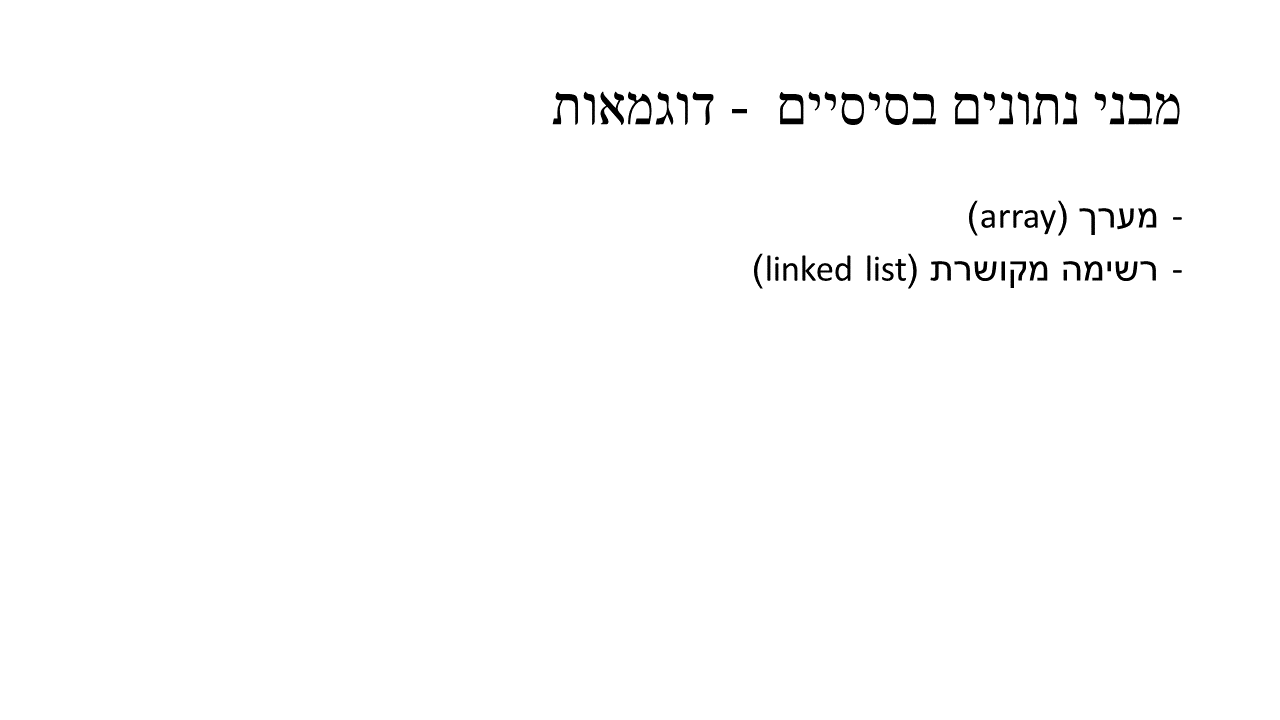

In [2]:
import numpy as np
import pandas as pd
import math
import graphviz 
from graphviz import nohtml

from IPython.display import display

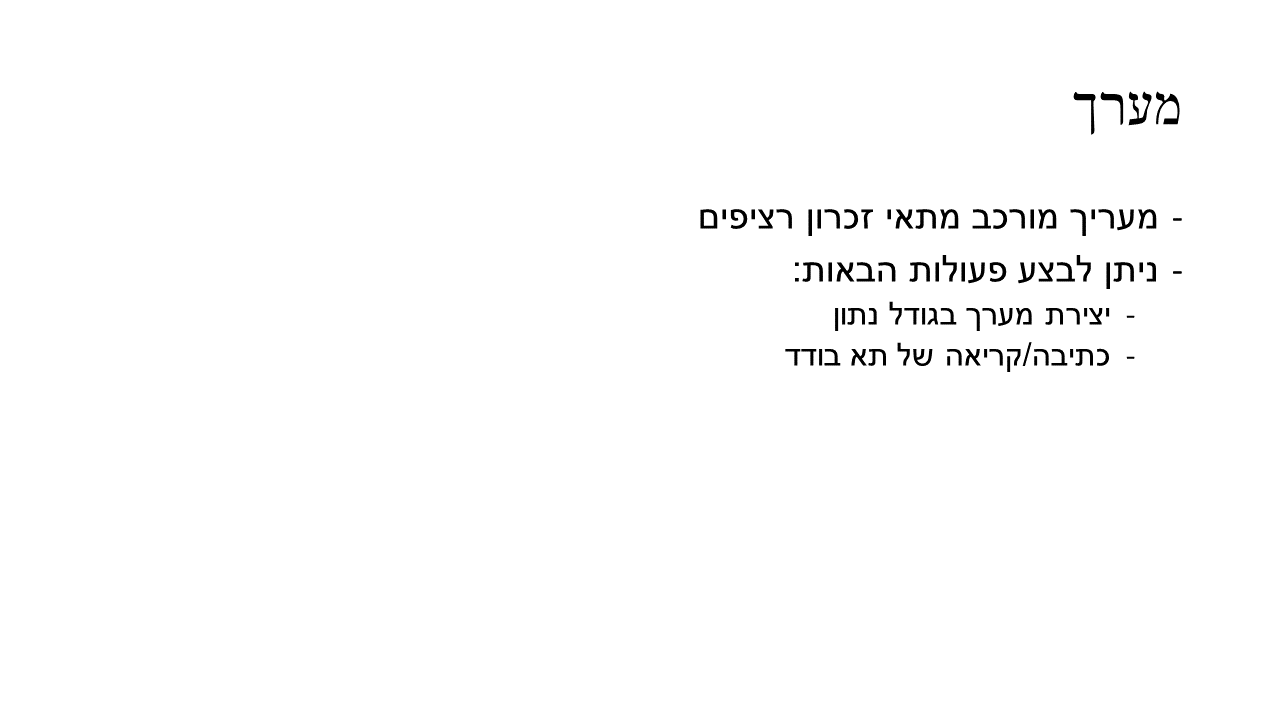

In [2]:
ar = [1, 2, 3, 4, 5]
print(ar)

[1, 2, 3, 4, 5]


In [3]:
len(ar)

5

In [4]:
ar[3] = 7
print(ar)

[1, 2, 3, 7, 5]


## Linked List

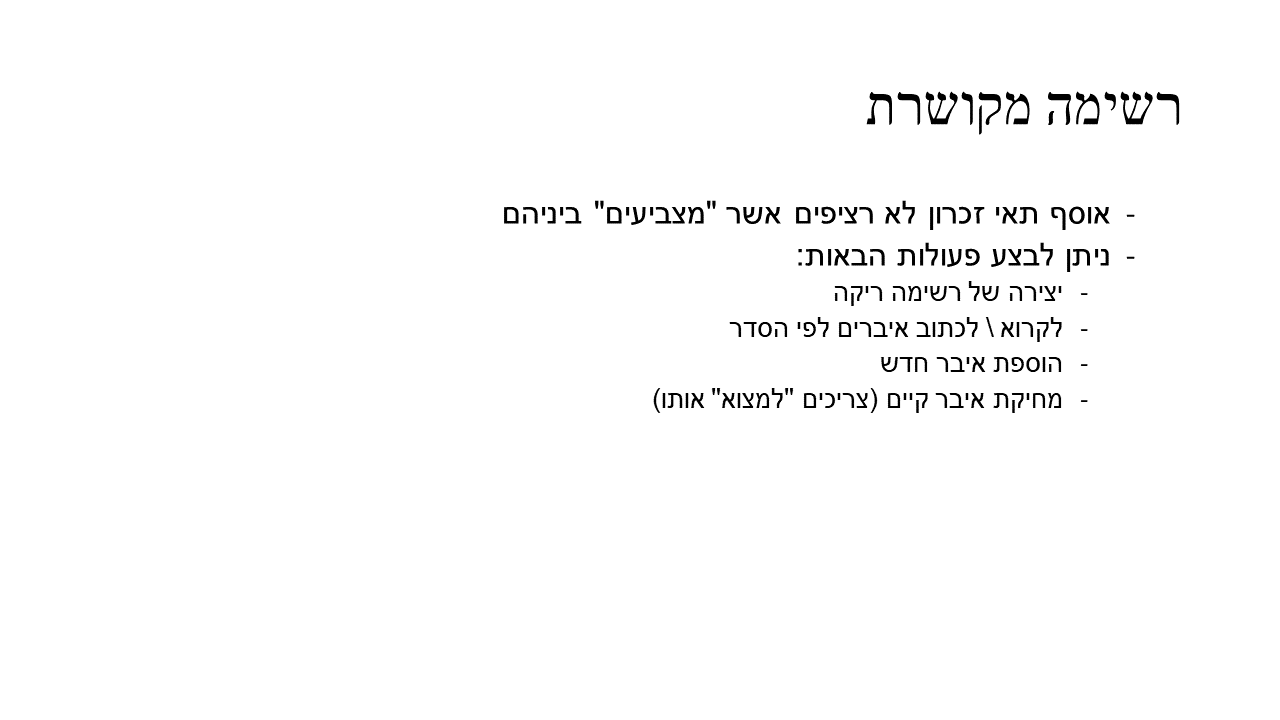

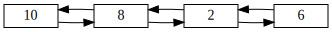

In [6]:
g = graphviz.Digraph('g', filename='btree.gv',
                     node_attr={'shape': 'record', 'height': '.1'})

g.graph_attr['rankdir'] = 'LR'
g.graph_attr['center'] = 'true'
#g.node('node0', nohtml('<f0> |<f1> 10| <f2>'))
#g.node('node1', nohtml('<f0> |<f1> 8| <f2>'))
#g.node('node2', nohtml('<f0> |<f1> 2| <f2>'))
#g.node('node3', nohtml('<f0> |<f1> 6| <f2>'))

g.node('node0', label='10')
g.node('node1', label='8')
g.node('node2', label='2')
g.node('node3', label='6')

g.edge('node0', 'node1')
g.edge('node1', 'node0')

g.edge('node1', 'node2')
g.edge('node2', 'node1')

g.edge('node2', 'node3')
g.edge('node3', 'node2')
#g.view()
display(g)

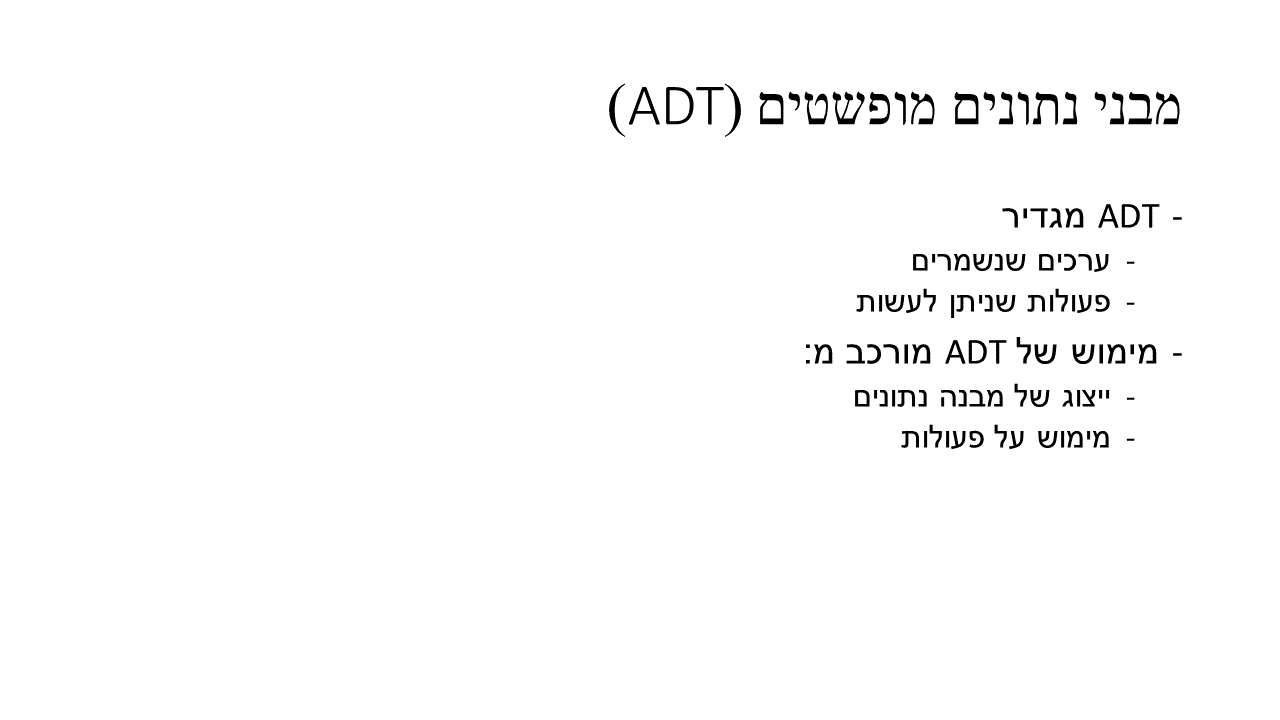

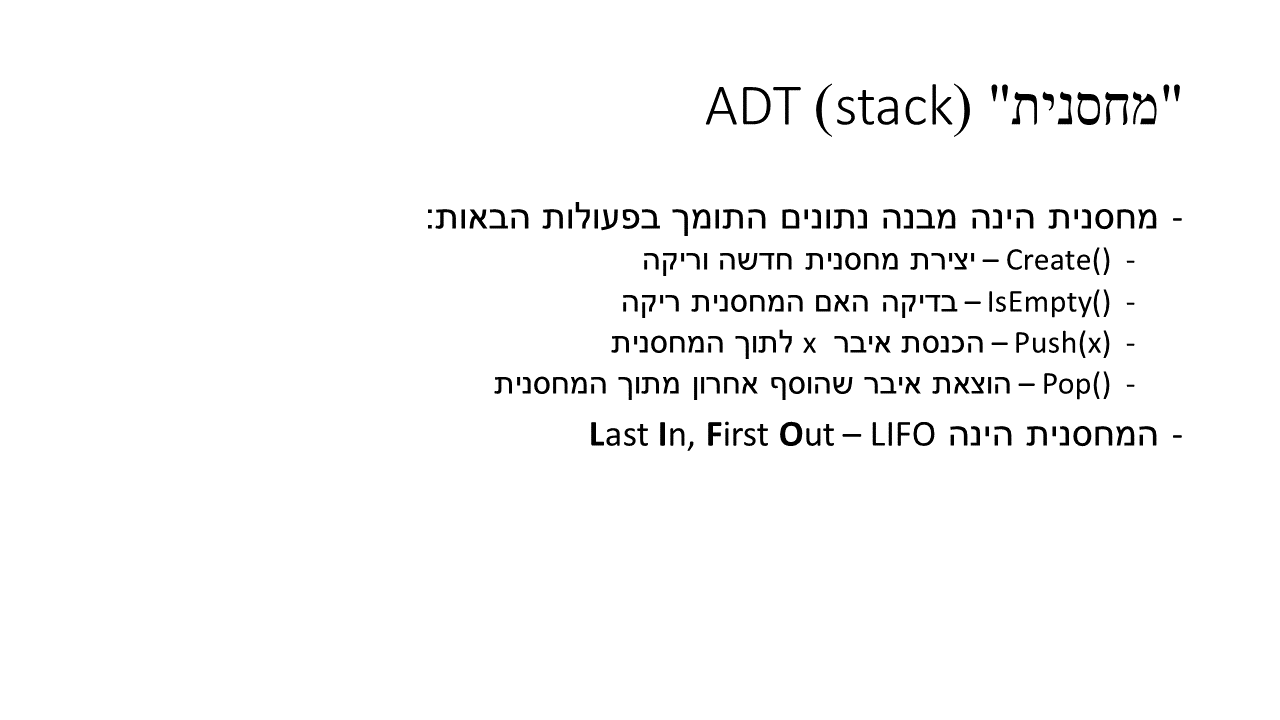

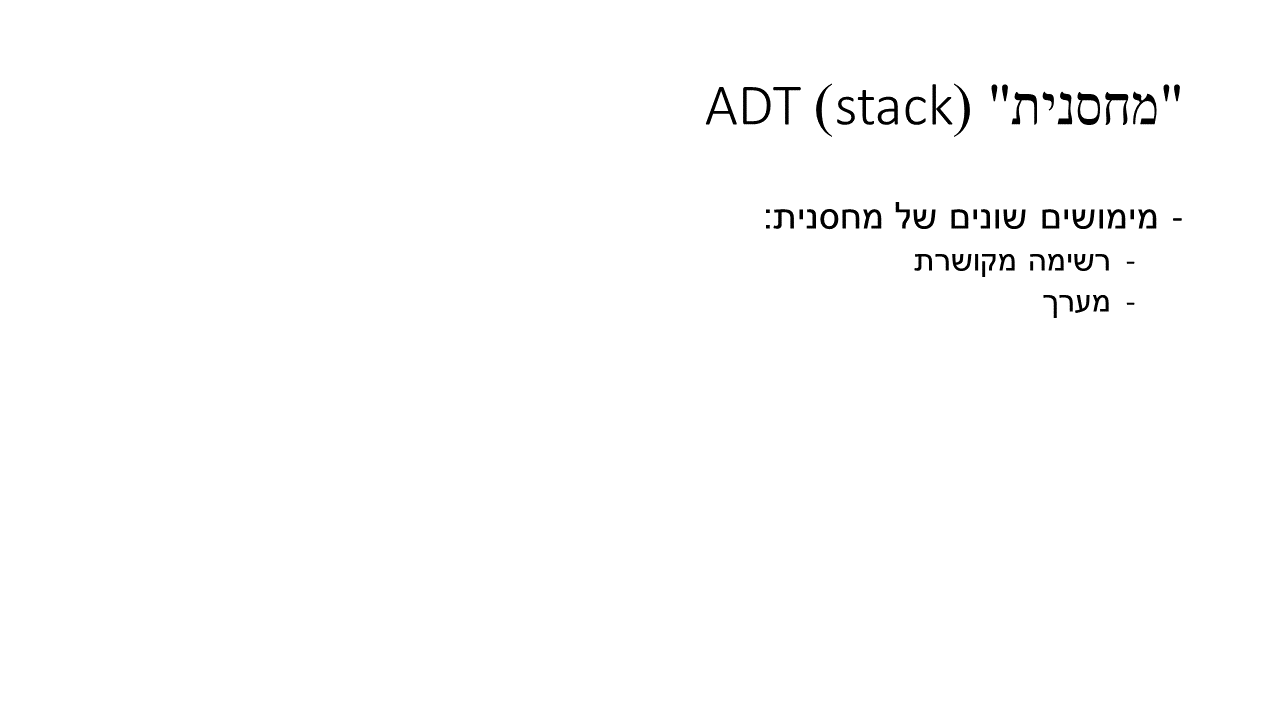

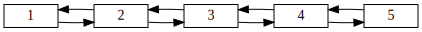

5
4
3
2
1
None
None


In [3]:
class Node:
    def __init__(self, val, name):
        self.val = val
        self.next = None
        self.prev = None
        self.name = name


class Stack:
    def __init__(self):
        self.head = self
        self.tail = self
        self.size = 0

    def Create(self):
        self.head = None
        self.tail = self.head
        self.size = 0
        self.nodeName = 0

    def IsEmpty(self):
        return self.size == 0

    def Push(self, val):
        if self.IsEmpty():
            self.head = Node(val, "node" + str(self.nodeName))
            self.tail = self.head
        else:
            self.tail.next = Node(val, "node" + str(self.nodeName))
            self.tail.next.prev = self.tail
            self.tail = self.tail.next
        self.size += 1
        self.nodeName += 1

    def Pop(self):
        if self.IsEmpty():
            return None
        else:
            tail_val = self.tail.val
            self.tail = self.tail.prev
            if self.tail != None:
                self.tail.next = None
            self.size -= 1
            return tail_val

    def ToGraph(self, filename):
        g = graphviz.Digraph('g', filename=filename,
                             node_attr={'shape': 'record', 'height': '.1'})
        g.graph_attr['rankdir'] = 'LR'
        g.graph_attr['center'] = 'true'

        node = self.head
        while node != None:
            g.node(node.name, label=str(node.val))
            if node.next != None:
                g.edge(node.name, node.next.name)
            if node.prev != None:
                g.edge(node.name, node.prev.name)
            node = node.next
            
        
        #g.view()
        display(g)

def main():
    stack = Stack()
    stack.Create()
    stack.Push(1)
    stack.Push(2)
    stack.Push(3)
    stack.Push(4)
    stack.Push(5)

    stack.ToGraph("stack.gv")
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())

if __name__ == '__main__':
    main()

In [6]:
# implementation of  stack with array
# implement Stack using array
class Stack:
    def __init__(self):
        self.size = 0

    def Create(self):
        self.head = 0
        self.tail = 0
        self.array = [0 for i in range(100)]
        self.size = 0

    def IsEmpty(self):
        return self.size == 0

    def Push(self, val):
        if self.size == 100:
            return

        if self.IsEmpty():
            self.array[0] = val
            self.head = 0
            self.tail = self.head
        else:
            self.array[self.tail + 1] = val
            self.tail += 1
        self.size += 1

    def Pop(self):
        if self.IsEmpty():
            return None
        else:
            tail_val = self.array[self.tail]
            self.tail -= 1
            self.size -= 1
            return tail_val


def main():
    stack = Stack()
    stack.Create()
    stack.Push(1)
    stack.Push(2)
    stack.Push(3)
    
    print(stack.array[stack.head : stack.tail])
    
    stack.Push(4)
    stack.Push(5)
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())

if __name__ == '__main__':
    main()

[1, 2]
5
4
3
2
1
None
None


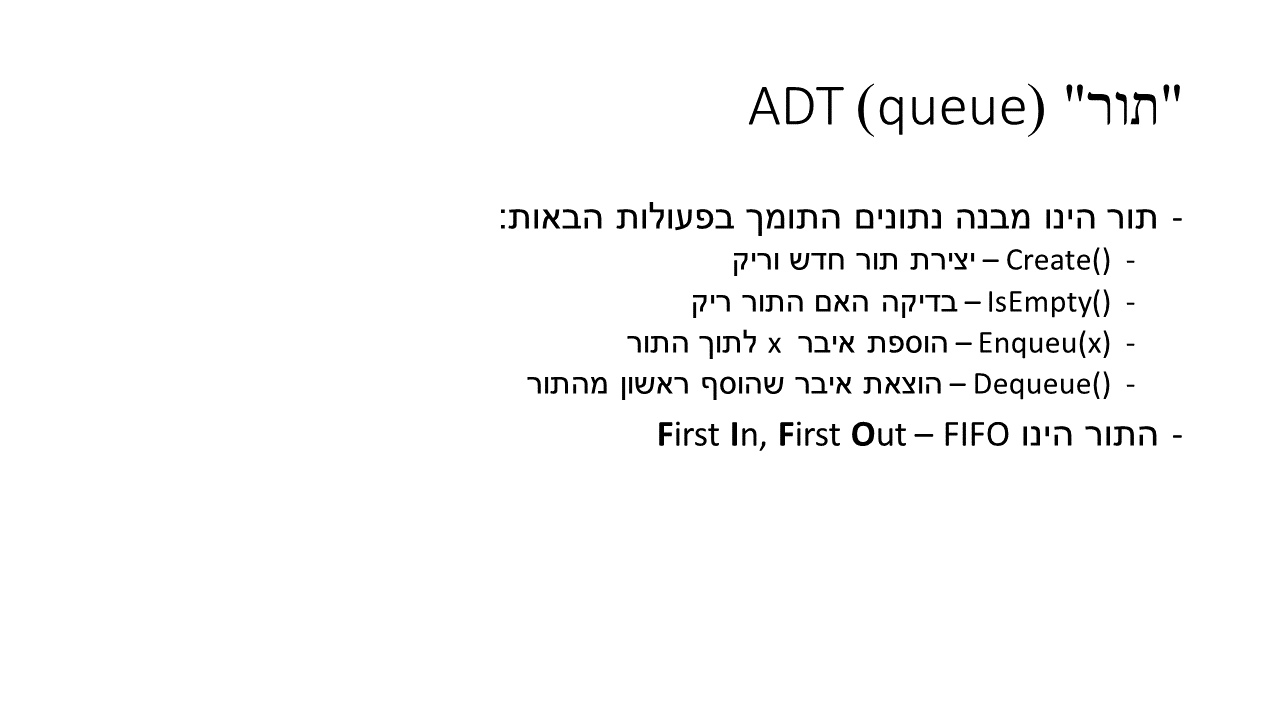

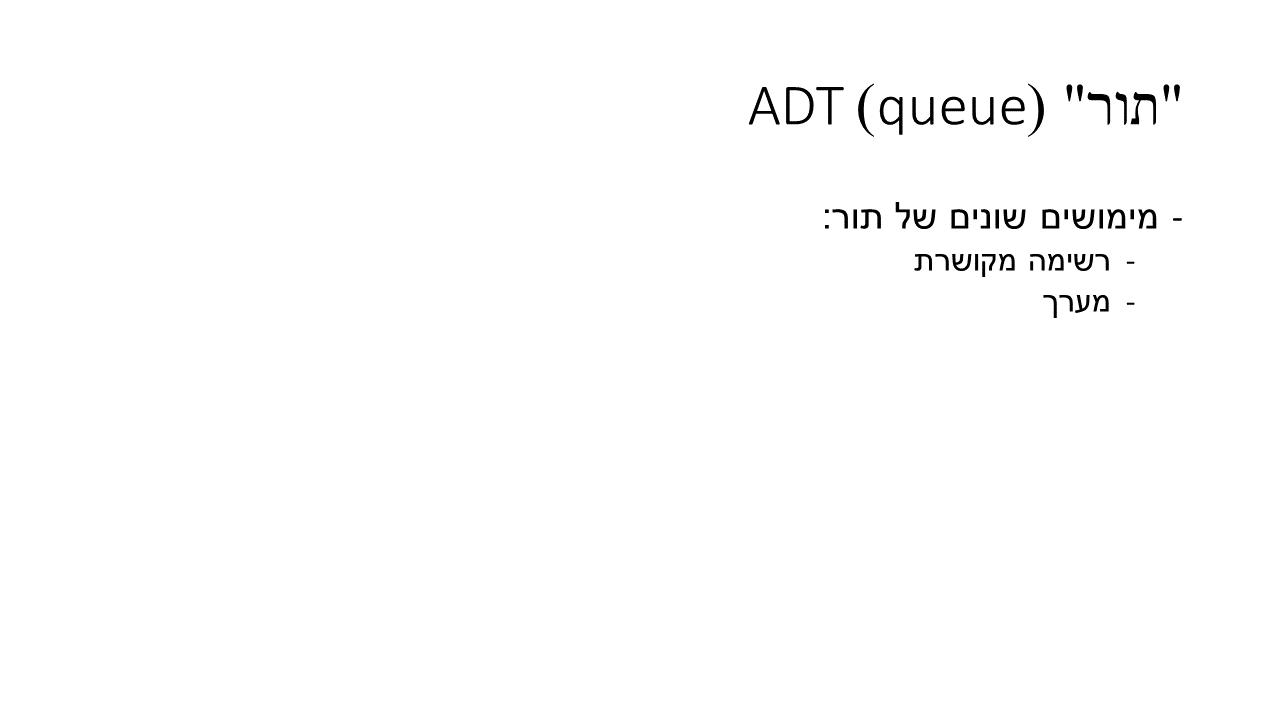

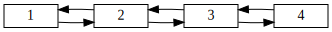

1
2
3
4
5
None
None


In [8]:
# Implementation of queue with linked list 
class Node:
    def __init__(self, val, name):
        self.val = val
        self.next = None
        self.prev = None
        self.name = name

class Queue:
    def __init__(self) -> None:
        self.head = None
        self.tail = None
        self.size = 0

    def Create(self) -> None:
        self.head = None
        self.tail = self.head
        self.size = 0
        self.nodeName = 0

    def Enqueue(self, val) -> None:
        if self.size == 0:
            self.head = Node(val, "node" + str(self.nodeName))
            self.tail = self.head
        else:
            self.tail.next = Node(val, "node" + str(self.nodeName))
            self.tail.next.prev = self.tail
            self.tail = self.tail.next
        self.size += 1
        self.nodeName += 1

    def Dequeue(self) -> int:
        if self.size == 0:
            return None
        else:
            head_val = self.head.val
            self.head = self.head.next
            if self.head != None:
                self.head.prev = None
            self.size -= 1
            return head_val
            
    def IsEmpty(self) -> bool:
        return self.size == 0

    def ToGraph(self, filename):
        g = graphviz.Digraph('g', filename=filename,
                             node_attr={'shape': 'record', 'height': '.1'})
        g.graph_attr['rankdir'] = 'LR'
        g.graph_attr['center'] = 'true'

        node = self.head
        while node != None:
            g.node(node.name, label=str(node.val))
            if node.next != None:
                g.edge(node.name, node.next.name)
            if node.prev != None:
                g.edge(node.name, node.prev.name)
            node = node.next
            
        #g.view()
        display(g)

def main():
    q = Queue()
    q.Create()
    q.Enqueue(1)
    q.Enqueue(2)
    q.Enqueue(3)
    q.Enqueue(4)
    
    q.ToGraph("queue.gv")
    
    q.Enqueue(5)
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())


if __name__ == '__main__':
    main()

In [7]:
# Implementation of queue with array
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None

class Queue:
    def __init__(self) -> None:
        pass

    def Create(self) -> None:
        self.head = 0
        self.tail = 0
        self.size = 0
        self.array = [0 for i in range(100)]

    def Enqueue(self, val) -> None:
        if self.tail == 100:
            return None
            
        if self.size == 0:
            self.array[0] = val
            self.head = 0
            self.tail = 0
        else:
            self.tail = self.tail + 1
            self.array[self.tail] = val
        self.size += 1

    def Dequeue(self) -> int:
        if self.size == 0:
            return None
        else:
            head_val = self.array[self.head]
            self.head = self.head + 1
            self.size -= 1
            return head_val
            
    def IsEmpty(self) -> bool:
        return self.size == 0


def main():
    q = Queue()
    q.Create()
    q.Enqueue(1)
    q.Enqueue(2)
    q.Enqueue(3)
    q.Enqueue(4)
    q.Enqueue(5)
    
    print(q.array[q.head:q.tail])
    
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())


if __name__ == '__main__':
    main()

[1, 2, 3, 4]
1
2
3
4
5
None
None


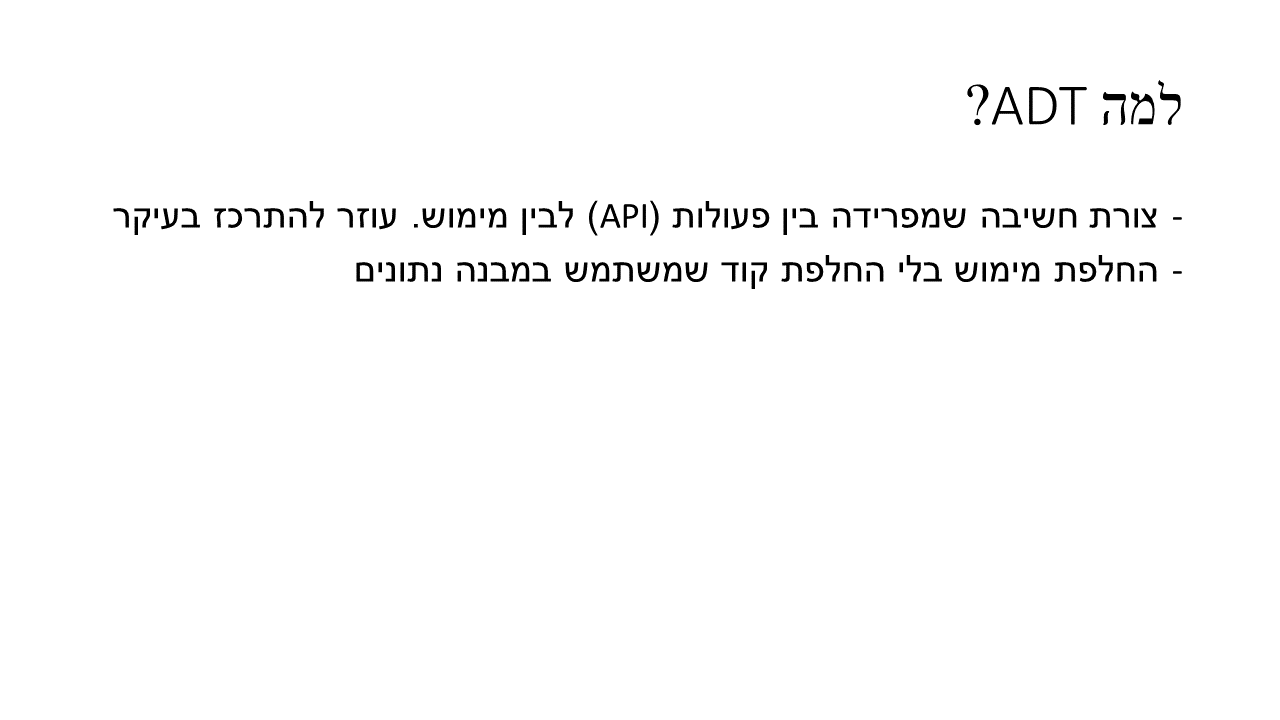

In [8]:
# final excersize with time measurement